In [ ]:
%matplotlib inline
from astropy.stats import sigma_clipped_stats
from photutils import CircularAperture, aperture_photometry, CircularAnnulus, DAOStarFinder
import astropy.io.fits as pf
import numpy as np
import seaborn as sns
sns.set()
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from matplotlib import pyplot as plt
import os
from scipy import stats

In [ ]:
directory = (r'C:\Users\garyc\Desktop\4th Year\Astro Project\Calibration\bias')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        os.chdir(directory)
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project')
avg = np.average(images,axis=0)
cropped = avg[1250:2750,1250:2750]
masterbias = np.full((4112,4096),np.mean(cropped))

In [3]:
directory = (r'C:\Users\garyc\Desktop\4th Year\Astro Project\Calibration\flats')
images = []
files = []
for file in os.listdir(directory):
    if file.endswith(".fits"):
        os.chdir(directory)
        image=pf.getdata(file)
        images.append(image)
        files.append(file)
    else:
        continue
Bflats = []
Vflats = []
Rflats = []
Iflats = []
for file in files:
    i = pf.open(file)
    if i[0].header['OBJECT'] == 'Flat_B':
        Bflats.append(file)
    if i[0].header['OBJECT'] == 'FLat_V':
        Vflats.append(file)
    if i[0].header['OBJECT'] == 'Flat_R':
        Rflats.append(file)
    if i[0].header['OBJECT'] == 'Flat_I':
        Iflats.append(file)

In [ ]:
print(Iflats)

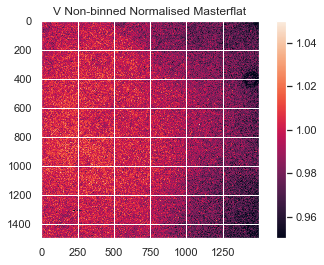

0.9909839891641595


In [5]:
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Calibration\flats')
Vflatlist = np.zeros((4112,4096))
for file in Vflats:
    image = pf.getdata(file)
    flat = image - masterbias
    Vflatlist += flat
masterflat = Vflatlist/len(Vflats)
mean = np.mean(masterflat[1500:2100,1500:2100])
normalisedmasterflat = masterflat/mean
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project')
Vnonbinnednormalisedmasterflat = normalisedmasterflat[1250:2750,1250:2750]
plt.imshow(Vnonbinnednormalisedmasterflat,vmin=0.95,vmax=1.05)
plt.title('V Non-binned Normalised Masterflat')
plt.colorbar()
plt.show()
print(np.mean(Vnonbinnednormalisedmasterflat))
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project')
newheader = pf.PrimaryHDU(normalisedmasterflat)
newheader.writeto('Vnonbinnedmasterflat.fits', overwrite=True)

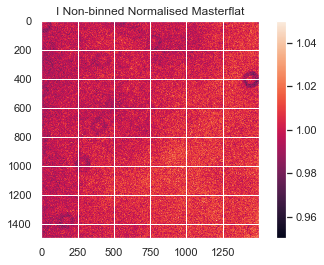

1.0026203836960337


In [4]:
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\Calibration\flats')
Iflatlist = np.zeros((4112,4096))
for file in Iflats:
    image = pf.getdata(file)
    flat = image - masterbias
    Iflatlist += flat
masterflat = Iflatlist/len(Iflats)
mean = np.mean(masterflat[1500:2100,1500:2100])
normalisedmasterflat = masterflat/mean
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project')
Ibinnednormalisedmasterflat = normalisedmasterflat[1250:2750,1250:2750]
plt.imshow(Ibinnednormalisedmasterflat,vmin=0.95,vmax=1.05)
plt.title('I Non-binned Normalised Masterflat')
plt.colorbar()
plt.show()
print(np.mean(Ibinnednormalisedmasterflat))
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project')
newheader = pf.PrimaryHDU(normalisedmasterflat)
newheader.writeto('Inonbinnedmasterflat.fits', overwrite=True)